In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('./netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


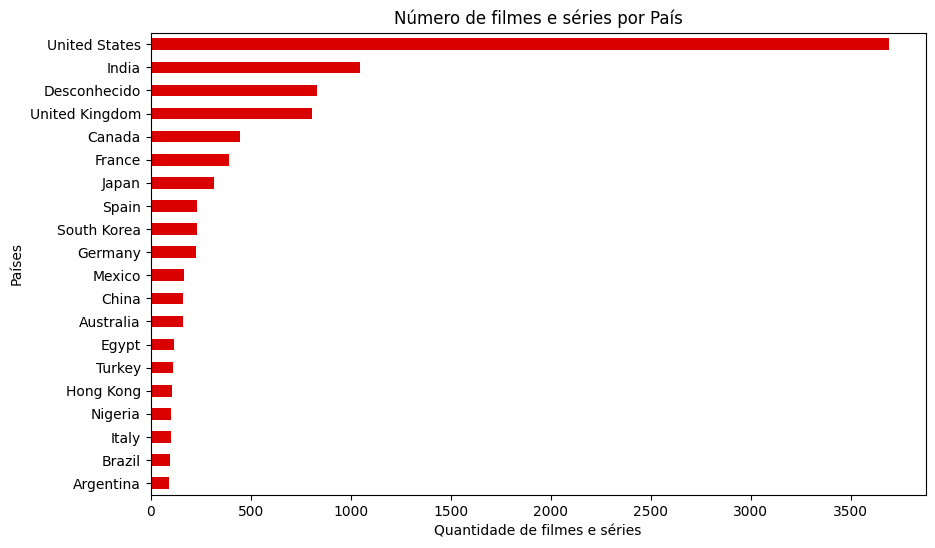

In [2]:
show_by_country = data

# Remover nulls
show_by_country['country'] = show_by_country['country'].fillna('Desconhecido')

# Lidando com as células com vários países
show_by_country = show_by_country.assign(country=show_by_country['country'].str.split(', ')).explode('country')

# Contar o número de shows por país
shows_count = show_by_country['country'].value_counts()

plt.figure(figsize=(10, 6))
shows_count[:20].plot(kind='barh', color='#db0000') 
plt.title('Número de filmes e séries por País')
plt.xlabel('Quantidade de filmes e séries')
plt.ylabel('Países')
# inverter os eixos deixando países no eixo Y
plt.gca().invert_yaxis()
plt.show()

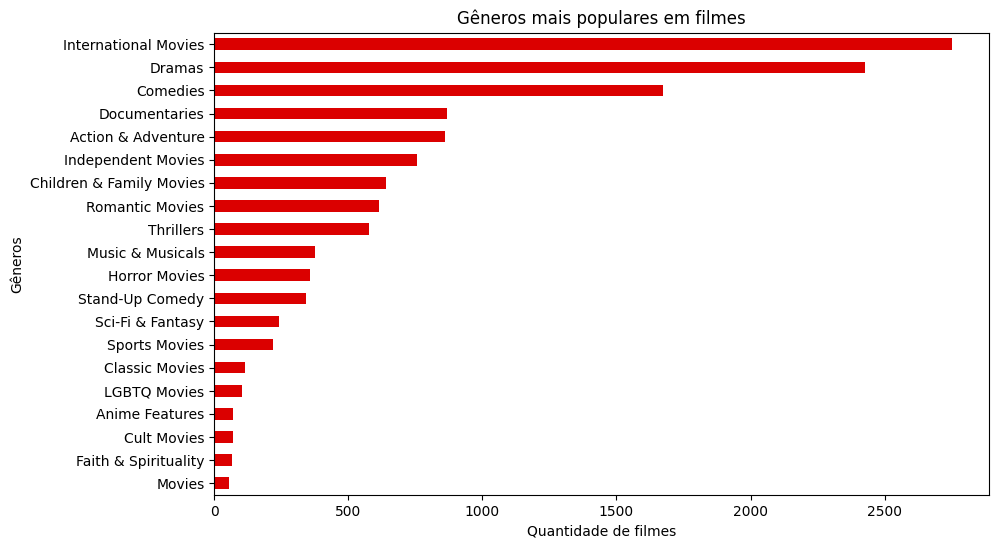

In [3]:
movies = data[data['type'] == 'Movie']

# Lidando com as células com vários gêneros
movies = movies.assign(listed_in=movies['listed_in'].str.split(', ')).explode('listed_in')


# Contar o número de gêneros
genres = movies['listed_in'].value_counts()

plt.figure(figsize=(10, 6))
genres[:20].plot(kind='barh', color='#db0000') 
plt.title('Gêneros mais populares em filmes')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Gêneros')
# inverter os eixos deixando gêneros no eixo Y
plt.gca().invert_yaxis()
plt.show()

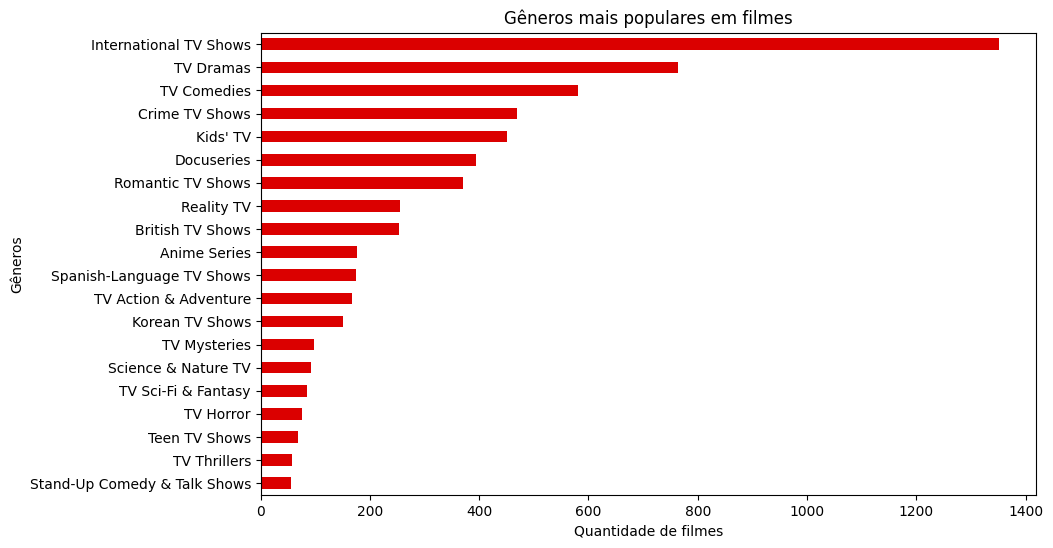

In [4]:
shows = data[data['type'] == 'TV Show']

# Lidando com as células com vários gêneros
shows = shows.assign(listed_in=shows['listed_in'].str.split(', ')).explode('listed_in')


# Contar o número de gêneros
genres = shows['listed_in'].value_counts()

plt.figure(figsize=(10, 6))
genres[:20].plot(kind='barh', color='#db0000') 
plt.title('Gêneros mais populares em filmes')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Gêneros')
# inverter os eixos deixando gêneros no eixo Y
plt.gca().invert_yaxis()
plt.show()

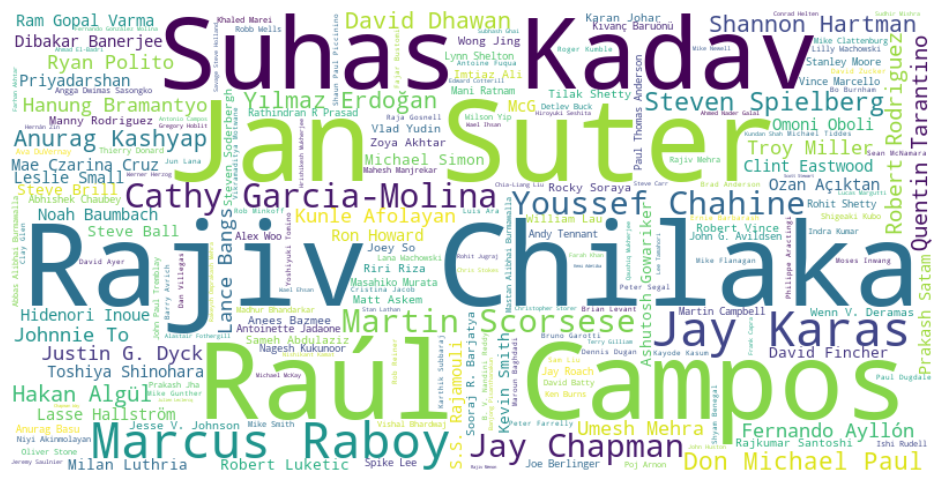

In [13]:
from wordcloud import WordCloud

# removendo nulls
diretores = data.dropna(subset=['director'])

diretores = diretores.assign(director=diretores['director'].str.split(', ')).explode('director')

diretores.loc[:, "nome_com_underline"] = diretores["director"].str.replace(" ", "_")

texto = " ".join(diretores["nome_com_underline"])

frequencias = {}
for nome in texto.split():
    nome_corrigido = nome.replace("_", " ")  # Restaurar espaços
    frequencias[nome_corrigido] = frequencias.get(nome_corrigido, 0) + 1

# Foi preciso criar com base na frequêcia, caso contrário, nome e sobrenome seriam considerados palavras diferentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencias)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

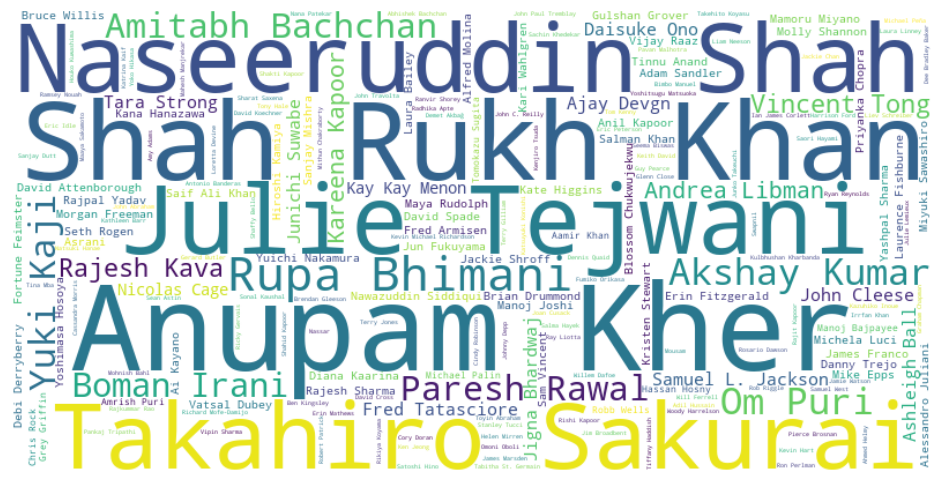

In [ ]:
from wordcloud import WordCloud

# removendo nulls
elenco = data.dropna(subset=['cast'])

elenco = elenco.assign(cast=elenco['cast'].str.split(', ')).explode('cast')

elenco.loc[:, "nome_com_underline"] = elenco["cast"].str.replace(" ", "_")

texto = " ".join(elenco["nome_com_underline"])

frequencias = {}
for nome in texto.split():
    nome_corrigido = nome.replace("_", " ")  # Restaurar espaços
    frequencias[nome_corrigido] = frequencias.get(nome_corrigido, 0) + 1

# Foi preciso criar com base na frequêcia, caso contrário, nome e sobrenome seriam considerados palavras diferentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencias)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
df = pd.read_csv('./netflix_titles.csv')

In [8]:
# Remover inconsistências
df['date_added'] = df['date_added'].str.strip()

# Converter as strings de Dia Mes, Ano para AAAA-MM-DD
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

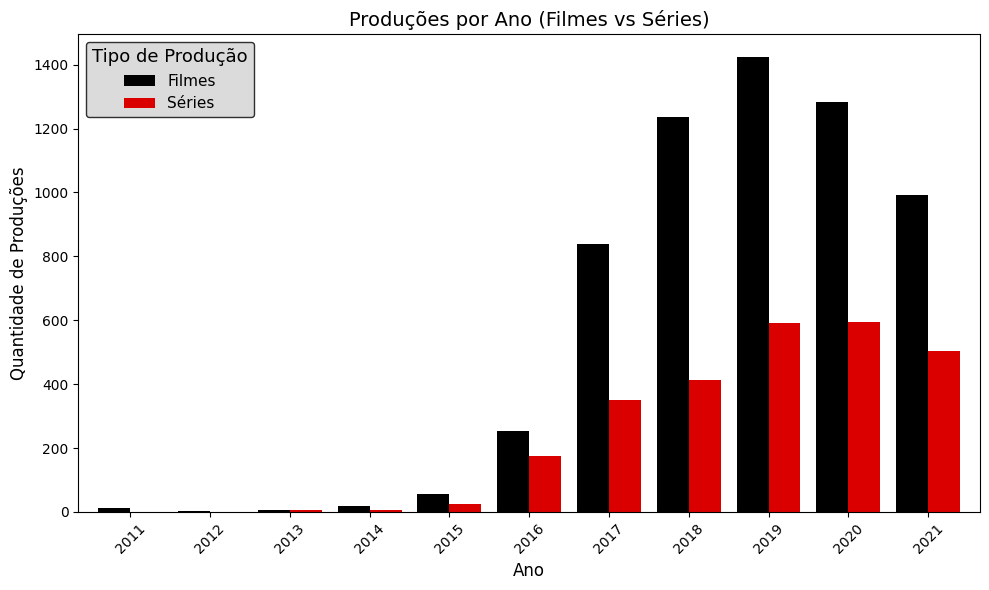

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['ano'] = df['date_added'].dt.year.fillna(0).astype(int)

# Pegar dados dos últimos 10 anos
df_dez_anos = df[df['ano'] >= 2011].groupby(['ano', 'type']).size().unstack(fill_value=0)

ax = df_dez_anos.plot(kind='bar', figsize=(10, 6), width=0.8, color=['black', '#db0000'])

ax.set_title('Produções por Ano (Filmes vs Séries)', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Produções', fontsize=12)
ax.set_xticklabels(df_dez_anos.index, rotation=45)
ax.legend(title='Tipo de Produção', title_fontsize='13', labels=['Filmes', 'Séries'], fontsize='11', 
          frameon=True, loc='upper left', facecolor='lightgray', edgecolor='black')
plt.tight_layout()

plt.show()

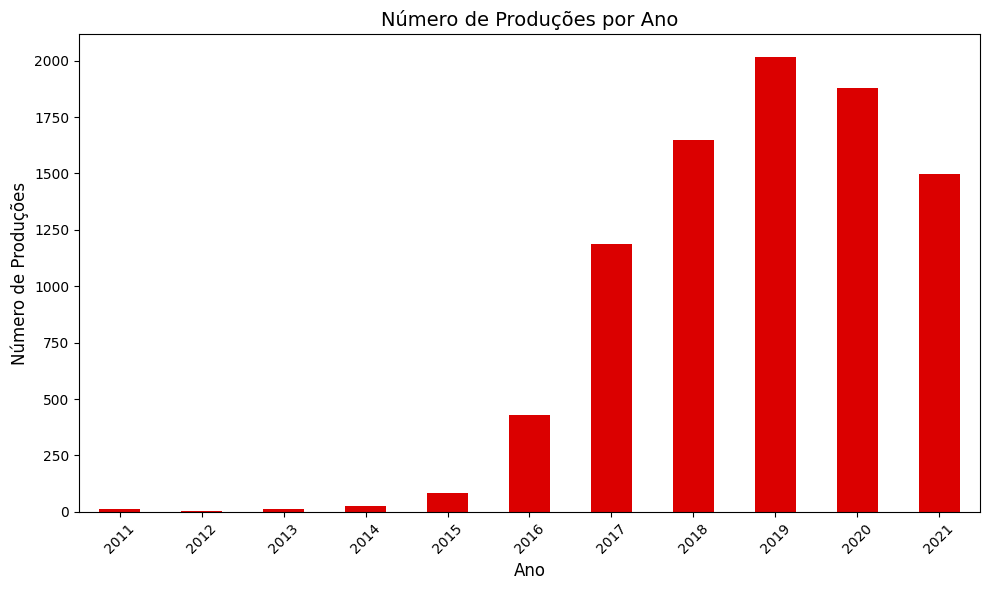

In [10]:
df_contagem_por_ano = df[df['ano'] >= 2011]

contagem_por_ano = df_contagem_por_ano.groupby('ano').size()

contagem_por_ano.plot(kind='bar', figsize=(10, 6), color='#db0000')

plt.title('Número de Produções por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Produções', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

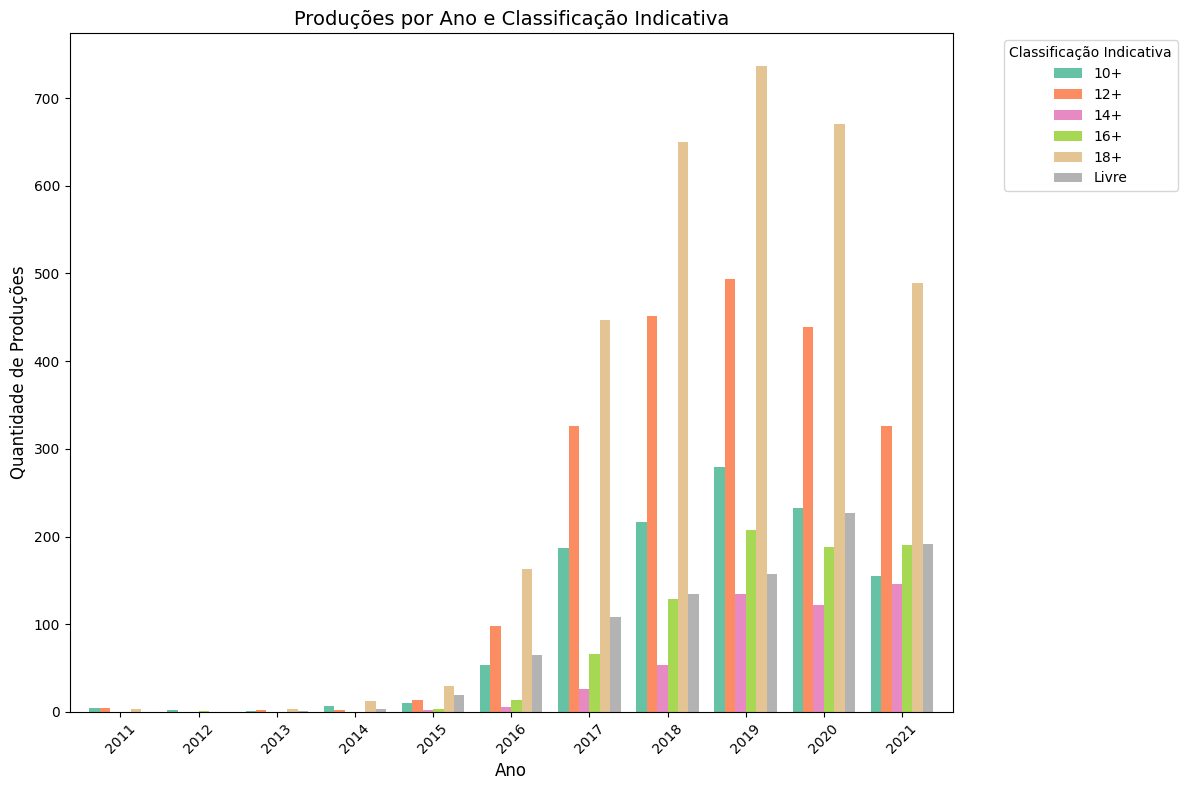

In [11]:
classificacao_convertida = {
    'TV-Y': 'Livre', 'TV-Y7': 'Livre', 'TV-G': 'Livre', 'G': 'Livre', 'TV-Y7-FV': 'Livre',
    'PG': '10+', 'TV-PG': '10+',
    'TV-14': '12+', 
    'PG-13': '14+',
    'R': '16+',
    'TV-MA': '18+', 'NC-17': '18+'
}

df['rating_category'] = df['rating'].map(classificacao_convertida)

df_ultimos_anos = df[df['ano'] >= 2011]

classification_counts = df_ultimos_anos.groupby(['ano', 'rating_category']).size().unstack(fill_value=0)

ax = classification_counts.plot(kind='bar', stacked=False, figsize=(12, 8), width=0.8, colormap='Set2')

ax.set_title('Produções por Ano e Classificação Indicativa', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Produções', fontsize=12)
ax.set_xticklabels(classification_counts.index, rotation=45)

ax.legend(title="Classificação Indicativa", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()

plt.show()

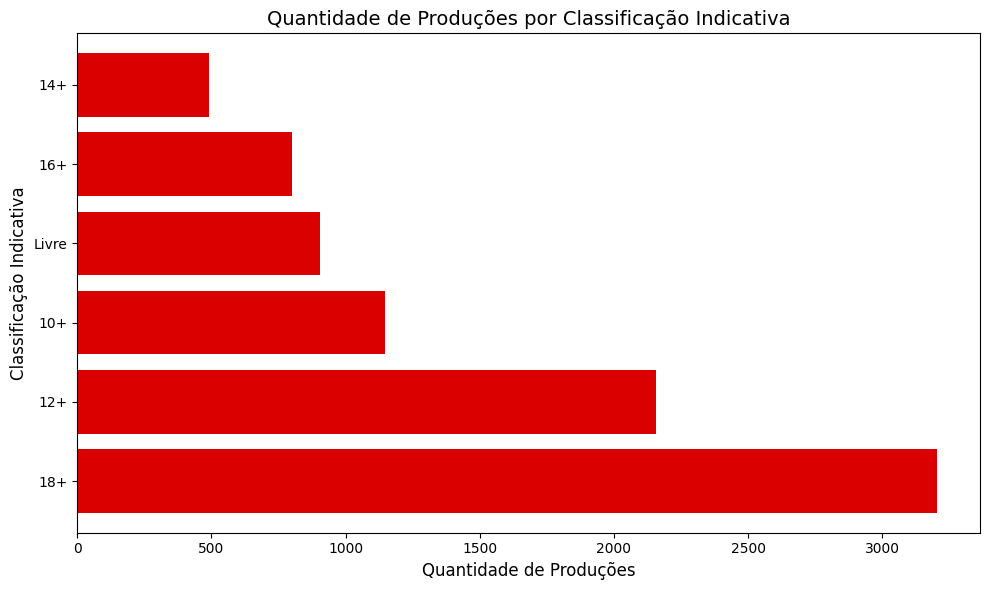

In [12]:
classification_count = df_ultimos_anos['rating_category'].value_counts()

ax = classification_count.plot(kind='barh', figsize=(10, 6), color='#db0000', width=0.8)

ax.set_title('Quantidade de Produções por Classificação Indicativa', fontsize=14)
ax.set_xlabel('Quantidade de Produções', fontsize=12)
ax.set_ylabel('Classificação Indicativa', fontsize=12)

plt.tight_layout()
plt.show()